In [51]:
from keras.models import load_model
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [27]:
model = load_model('model.h5')

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 68, 68, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 256)         295168    
__________

In [52]:
path = "./Data/TestingData/"
imgs = []
labels= []
brands = os.listdir(path)
print(brands)
for idcar, brand in enumerate(brands):
    img = os.listdir(path+brand)
    for i, value in enumerate(img):
        imgs.append(value)
        labels.append(idcar)

['Buick', 'Chery', 'Citroen', 'Honda', 'Hyundai', 'Lexus', 'Mazda', 'Peugeot', 'Toyota', 'VW']


In [53]:
from PIL import Image
images = np.array([ np.array( Image.open(path+brands[labels[i]]+'/'+value).convert("RGB") ).flatten() for i, value in enumerate(imgs)], order='F', dtype='uint8')
print('total images: ', np.shape(images) )

total images:  (1500, 14700)


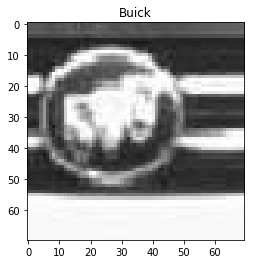

In [54]:
plt.imshow(images[1].reshape(70, 70, 3))
plt.title(brands[labels[1]])
plt.show()

In [55]:
im1 = images[1].reshape(1,70,70,3)
predictions = model.predict(im1)
result = np.where(predictions[0] == np.amax(predictions[0]))
index = predictions[0].argmax()
print(brands[index])
print(result)

Buick
(array([0], dtype=int64),)


In [56]:
import cv2 
import os 
  
obj = cv2.VideoCapture("./CarPromo.mp4") 

framecnt = 0
count = [0,0,0,0,0,0,0,0,0,0]
  
while(True):  
    ret,frame = obj.read() 
  
    if ret:
        im1 = frame.reshape(1,70,70,3)
        predictions = model.predict(frame)
       # result = np.where(predictions[0] == np.amax(predictions[0]))
        index = predictions[0].argmax()
        annotatn = brands[index]
        count[index]+=1 
        framecnt += 1
    else: 
        break
        
obj.release() 
cv2.destroyAllWindows() 


ValueError: cannot reshape array of size 691200 into shape (1,70,70,3)

In [62]:
from darkflow.net.build import TFNet


ModuleNotFoundError: No module named 'darkflow'